## 01 - Data Exploration (Understanding Data)

I)   Read raw data tables saved as csv format
II)  Perform exploratory analysis to understand the data
III) Perform simple Machine Learning algorithm for weather prediction
IV)  The data used id provided within the folder if this note book

II)  Perform exploratory analysis to understand the data
III) Perform simple Machine Learning algorithm for weather prediction
IV)  The data used id provided within the folder if this note book

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Read CSV Data File
df = pd.read_csv(r"weather.csv")
df

In [ ]:
# View dataframe column/ row information, size and data types 
df.head()
df.tail()
df.shape
df.index
df.columns
df.dtypes

In [ ]:
df['Rainfall'].unique() # Display non duplicate values (unique) #type:ignore
df.nunique() # Display a total of unique values
df['Evaporation'].value_counts()
df.count # Display a total of not null values
df.isna().sum() # Check null values
df.info()
df.describe()

In [ ]:
# Rename a column
df.rename (columns = {'Wind Gust Speed' : 'WindGustSpeed'}, inplace = True)
df.columns

In [ ]:
df.dtypes
df.duplicated().sum() # Check duplicates
df1 = df.drop("WindGustDir", "RainToday", "RainTomorrow") # Delete columns


In [ ]:
# Select multiple columns by conditions
df[(df['WindGustSpeed'] < 20)  & (df['Rainfall'] > 0.1)]


In [ ]:
# Select columns containing numerical data
numerical_columns = df.select_dtypes(include='number')


# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize = (6, 6))
    sns.boxplot(data = df[column])
    plt.title(f'Box Plot - {column}')
    plt.show()

In [ ]:
# Removing outliers
q1, q2, q3 = np.percentile(numerical_columns["Evaporation"], [4, 8, 12])
iqr = q3 - q1
lower_extreme = q1 - 1.5 * iqr
upper_extreme = q3 + 1.5 * iqr
num1 = numerical_columns.loc[(df["Evaporation"] >= lower_extreme) & (df["Evaporation"] <= upper_extreme)]
num1


In [ ]:
num1.reset_index(drop = True, inplace = True)
num1

## 02 - Exploratory Data Analysis

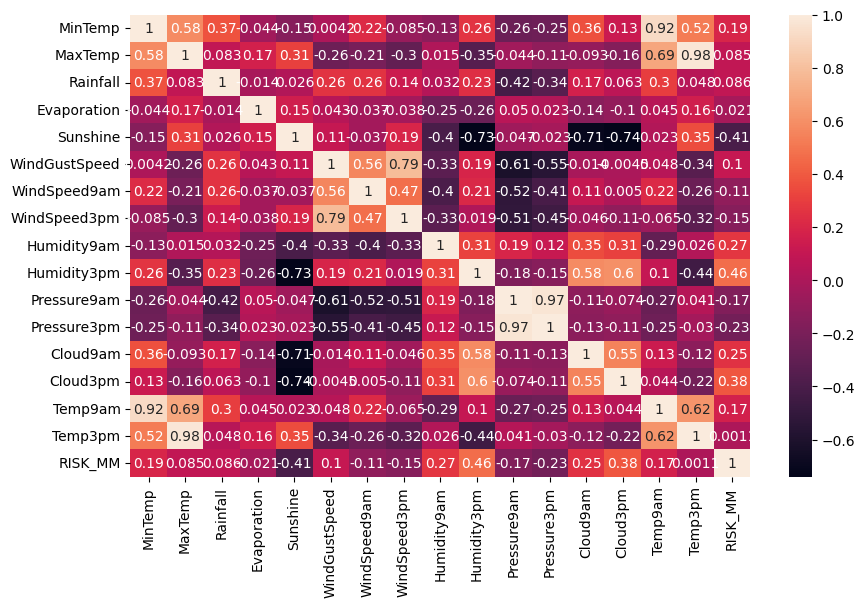

In [110]:
# Finding Correlation
plt.figure(figsize = (10, 6))
sns.heatmap(data = num1.corr(), annot = True)
plt.show()

In [ ]:
# Scatterplot of Rainfall vs all columns
for column in num1:
    plt.figure(figsize = (10, 6))
    sns.scatterplot(data = num1, x = num1[column], y = num1["Rainfall"])
    plt.xlabel(column, weight = "bold", fontsize = 12, labelpad = 10)
    plt.ylabel("Rainfall", weight = "bold", fontsize = 12, labelpad = 10)
    plt.xticks(weight = "bold")
    plt.yticks(weight = "bold")
    plt.show()

c:\Users\LUNA\Envs\DATASCI\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LUNA\Envs\DATASCI\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


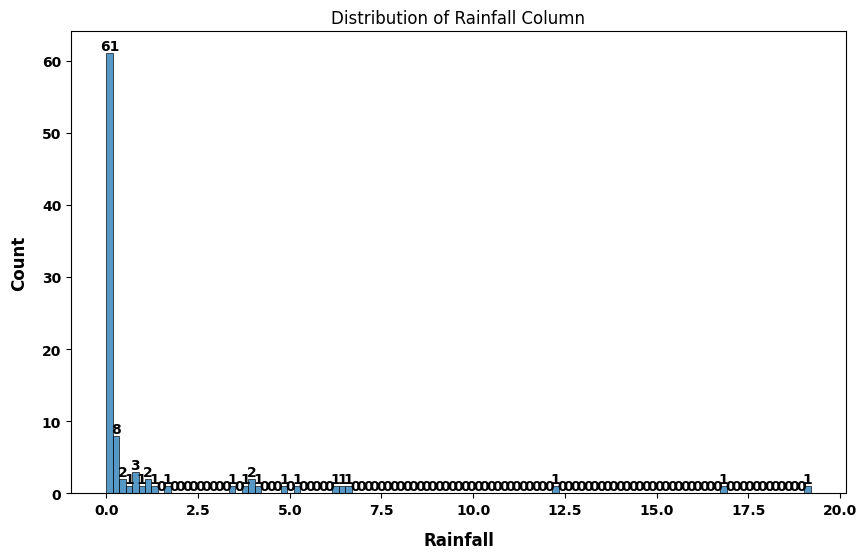

In [119]:
# Distribution of Rainfall Column
plt.figure(figsize = (10, 6))
ax = sns.histplot(data = num1, x = num1["Rainfall"])
plt.title("Distribution of Rainfall Column")
plt.xlabel("Rainfall", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Count", weight = "bold", fontsize = 12, labelpad = 10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")

for i in ax.containers:
    i.datavalues
    ax.bar_label(i, weight = "bold")

plt.show()